In [ ]:
## Kütüphane Importları

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import string

from wordcloud import WordCloud

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import LatentDirichletAllocation

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')


In [ ]:
## Veri Setini Tanımlama
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [ ]:
## Veri Analizi

def check_df(df_fake, head=5):
    print("### Shape ###"); print(df_fake.shape)
    print("\n### Types ###"); print(df_fake.dtypes)
    print(f"\n### Head ({head}) ###"); print(df_fake.head(head))
    print(f"\n### Tail ({head}) ###"); print(df_fake.tail(head))
    print("\n### Missing Values ###"); print(df_fake.isnull().sum())
    print(f"\nAny Missing? {df_fake.isnull().any().any()}")
    print(f"\nDuplicate Rows: {df_fake.duplicated().sum()}")
    print("\n### Quantiles ###"); print(df_fake.describe([0, 0.5, 0.95, 0.99, 1]).T)

check_df(df_fake)

### Shape ###
(23481, 4)

### Types ###
title      object
text       object
subject    object
date       object
dtype: object

### Head (5) ###
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 201

In [ ]:
## Veri Analizi

def check_df(df_true, head=5):
    print("### Shape ###"); print(df_true.shape)
    print("\n### Types ###"); print(df_true.dtypes)
    print(f"\n### Head ({head}) ###"); print(df_true.head(head))
    print(f"\n### Tail ({head}) ###"); print(df_true.tail(head))
    print("\n### Missing Values ###"); print(df_true.isnull().sum())
    print(f"\nAny Missing? {df_true.isnull().any().any()}")
    print(f"\nDuplicate Rows: {df_true.duplicated().sum()}")
    print("\n### Quantiles ###"); print(df_true.describe([0, 0.5, 0.95, 0.99, 1]).T)

check_df(df_true)

### Shape ###
(21417, 4)

### Types ###
title      object
text       object
subject    object
date       object
dtype: object

### Head (5) ###
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3 

In [ ]:
## Veri Setlerine Sınıf Etiketleri Ekleme

df_true["class"] = 1
df_fake["class"] = 0

In [ ]:
df_true.shape, df_fake.shape

((21417, 5), (23481, 5))

In [ ]:
## Test Verisi Ayırma ve Ana Veri Setinden Çıkarma

df_fake_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
  df_fake.drop([i], axis = 0, inplace = True)

df_true_testing = df_true.tail(10)
for i in range(21416,21406,-1):
  df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_true.shape, df_fake.shape

((21407, 5), (23471, 5))

In [ ]:
## Test Veri Setlerine Sınıf Etiketleri Atama

df_fake_testing["class"] = 0
df_true_testing["class"] = 1

In [ ]:
df_fake_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
## Test için Ayrılan Gerçek Haberlere Sınıf Etiketi Atama

df_true_testing["class"] = 1

In [ ]:
## Veri Setlerini Birleştirme

df_merge = pd.concat([df_fake,df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
## Gereksiz Sütunları Temizleme ve Veri Setini Sadeleştirme

df = df_merge.drop(['title','subject','date'], axis = 1)

In [ ]:
df.isnull().sum()

,0
text,0
class,0


In [ ]:
df = df.sample(frac=1)
df.head()

,text,class
13691,Feeling safer? One of the sitting members on t...,0
18226,B b but the Russians! How can the media be bot...,0
2935,Trump supporters sure were in for a surprise a...,0
3148,It s only been a couple days since Republicans...,0
7339,NEW YORK (Reuters) - A handful of small public...,1


In [ ]:
## LDA ile Konu Modelleme ve Temel Kelimelerin Çıkarılma


# CountVectorizer kullanıyoruz (TF-IDF yerine)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(df['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=0)  # 5 konu
lda.fit(count_data)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

display_topics(lda, count_vectorizer.get_feature_names_out(), 10)


Topic 0:  ['trump', 'said', 'clinton', 'president', 'campaign', 'republican', 'election', 'donald', 'hillary', 'house']
Topic 1:  ['trump', 'people', 'just', 'like', 'said', 'twitter', 'police', 'don', 'women', 'right']
Topic 2:  ['media', 'news', 'government', 'security', 'political', 'new', 'information', 'story', 'report', 'intelligence']
Topic 3:  ['said', 'reuters', 'united', 'government', 'president', 'state', 'states', 'north', 'minister', 'china']
Topic 4:  ['said', 'trump', 'tax', 'house', 'president', 'state', 'percent', 'obama', 'new', 'year']


In [ ]:
df.reset_index(inplace=True)
df.drop(['index'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,Feeling safer? One of the sitting members on t...,0
1,B b but the Russians! How can the media be bot...,0
2,Trump supporters sure were in for a surprise a...,0
3,It s only been a couple days since Republicans...,0
4,NEW YORK (Reuters) - A handful of small public...,1


In [ ]:
## Metin Ön İşleme ve Temizleme Fonksiyonu

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
## Metin Verilerine Toplu Ön İşleme Uygulama,

df['text'] = df['text'].apply(wordopt)

In [ ]:
## Bağımsız ve Bağımlı Değişkenleri Tanımlama

x = ['text']
y = ['class']

In [ ]:
## Train Test Split


x = df['text']
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
## Model Tanımlama

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
## Tahmin Yapma

lr_pred = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9868092691622103

In [ ]:
## Sınıflandırma Modeli Performans Raporu

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5897
           1       0.98      0.99      0.99      5323

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



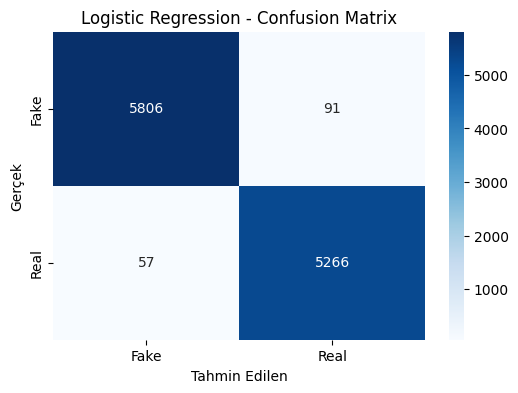

In [ ]:
## Karmaşıklık Matrisi Görselleştirmesi

cm = confusion_matrix(y_test, lr_pred)

# Seaborn heatmap ile görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


In [ ]:
## Decision Tree Modeli

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
## Decision Tree İle Tahmin

dt_pred = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.995632798573975

In [ ]:
## ## Sınıflandırma Modeli Performans Raporu

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5897
           1       0.99      1.00      1.00      5323

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



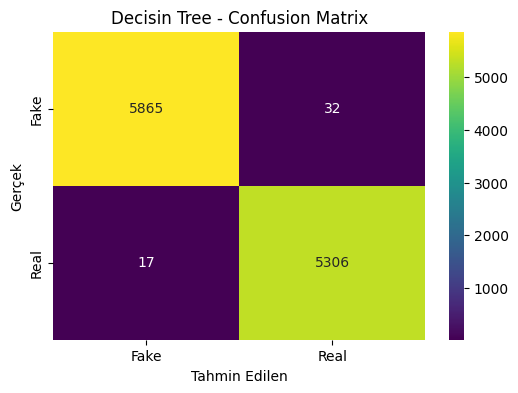

In [ ]:
## Karmaşıklık Matrisi Görselleştirmesi

cm = confusion_matrix(y_test, dt_pred)

# Seaborn heatmap ile görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Decisin Tree - Confusion Matrix')
plt.show()

In [ ]:
## Random Forest  Eğitimi

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
## Random Forest ile Tahmin

rf_pred = DT.predict(xv_test)
RF.score(xv_test, y_test)

0.9893939393939394

In [ ]:
## Random Forest Modeli Detaylı Performans Raporu

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5897
           1       0.99      1.00      1.00      5323

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



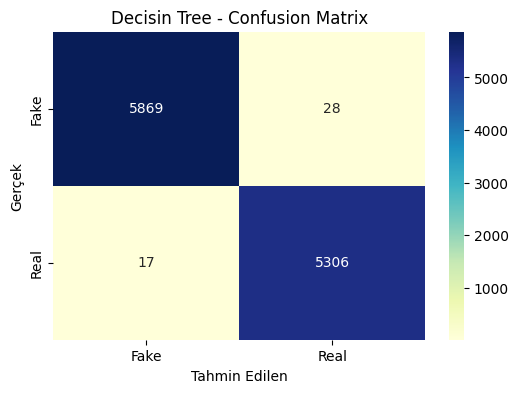

In [ ]:
## ## Karmaşıklık Matrisi Görselleştirmesi

cm = confusion_matrix(y_test, rf_pred)

# Seaborn heatmap ile görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Decisin Tree - Confusion Matrix')
plt.show()

In [ ]:
## Gradient Boosting Sınıflandırıcı Eğitimi

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
## Gradient Boosting Modeli ile Tahmin ve Doğruluk Hesaplama

gb_pred = DT.predict(xv_test)
GB.score(xv_test, y_test)

0.9955436720142602

In [ ]:
## Gradient Boosting Modeli Performans Değerlendirmesi

gb_pred = GB.predict(xv_test)
GB.score(xv_test, y_test)
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5897
           1       0.99      1.00      0.99      5323

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



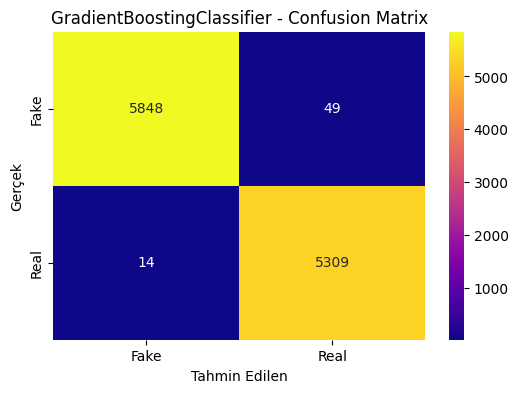

In [ ]:
## Karmaşıklık Matrisi Görselleştirmesi

cm = confusion_matrix(y_test, gb_pred)

# Seaborn heatmap ile görselleştirme
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('GradientBoostingClassifier - Confusion Matrix')
plt.show()

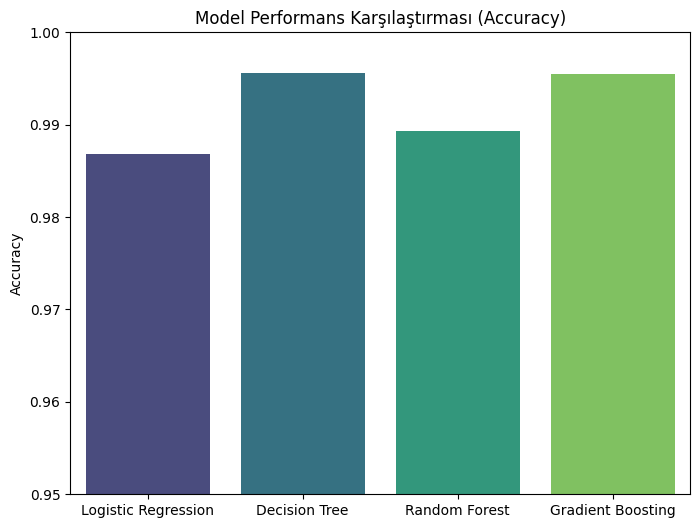

In [ ]:
## Model Performans Karşılaştırması Görselleştirmesi

model_scores = {
    "Logistic Regression": 0.9868,
    "Decision Tree": 0.9956,
    "Random Forest": 0.9893,
    "Gradient Boosting": 0.9955
}

plt.figure(figsize=(8,6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")
plt.title("Model Performans Karşılaştırması (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0.95,1.0)
plt.show()


In [ ]:
## Çapraz Doğrulama ile Model Performans Karşılaştırması


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, xv_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


Logistic Regression Cross-Validation Accuracy: 0.9850 (+/- 0.0019)
Decision Tree Cross-Validation Accuracy: 0.9960 (+/- 0.0008)
Random Forest Cross-Validation Accuracy: 0.9873 (+/- 0.0016)
Gradient Boosting Cross-Validation Accuracy: 0.9954 (+/- 0.0007)


In [ ]:
## Manuel Haber Testi ve Çoklu Model Tahmin Fonksiyonu

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    lr_pred = LR.predict(new_xv_test)
    dt_pred = DT.predict(new_xv_test)
    rf_pred = RF.predict(new_xv_test)
    gb_pred = GB.predict(new_xv_test)

    return print("\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}" .format(output_lable(lr_pred[0]),
                                                                                                              output_lable(dt_pred[0]),
                                                                                                              output_lable(gb_pred[0]),
                                                                                                              output_lable(rf_pred[0])))



In [ ]:
## Metin Girişi ve Test

news = str(input())
manual_testing(news)

"Bilim insanları Mars yüzeyinde yaşanabilir bir şehir keşfetti. NASA’dan yapılan açıklamaya göre şehirde solunabilir hava, hazır altyapı ve gizemli enerji kaynakları bulundu. Yetkililer, 2026 yılında bu şehre ilk insanlı uçuşu gerçekleştireceklerini duyurdu."

LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


# Ekstra Çalışma

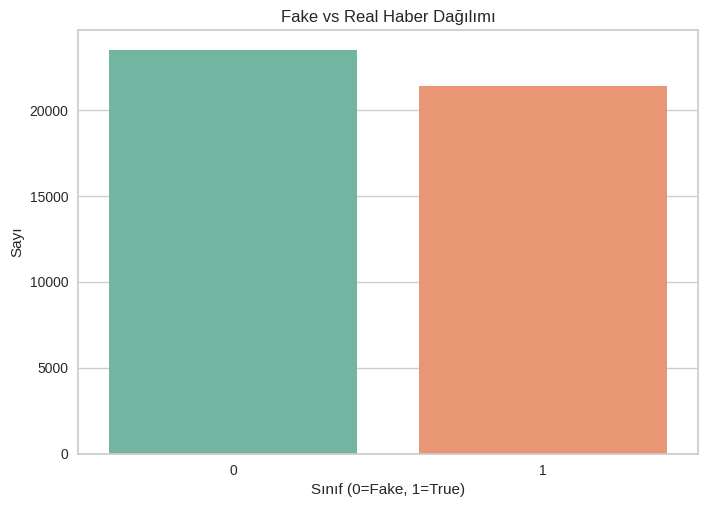

In [ ]:
## Veri Setindeki Sahte ve Gerçek Haberlerin Dağılımını Görselleştirme

sns.countplot(x='class', data=df, palette='Set2')
plt.title("Fake vs Real Haber Dağılımı")
plt.xlabel("Sınıf (0=Fake, 1=True)")
plt.ylabel("Sayı")
plt.show()


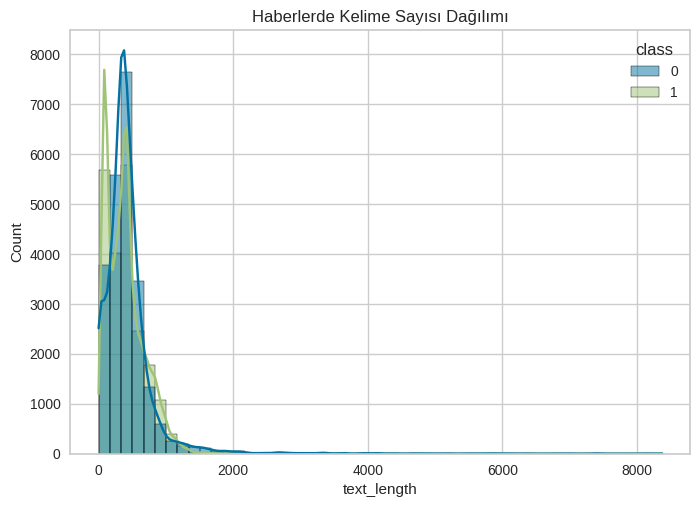

In [ ]:
## Haber Metinlerinin Kelime Uzunluğu Dağılımını Görselleştirme

df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='text_length', hue='class', bins=50, kde=True)
plt.title("Haberlerde Kelime Sayısı Dağılımı")
plt.show()


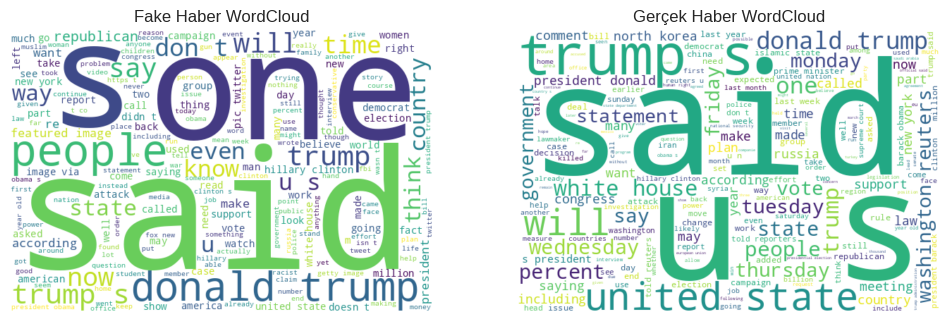

In [ ]:
## Sahte ve Gerçek Haberler için Kelime Bulutu Görselleştirmesi

from wordcloud import WordCloud

fake_text = " ".join(df[df['class']==0]['text'])
real_text = " ".join(df[df['class']==1]['text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc_fake = WordCloud(width=600, height=400, background_color="white").generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("Fake Haber WordCloud")
plt.axis("off")

plt.subplot(1,2,2)
wc_real = WordCloud(width=600, height=400, background_color="white").generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Gerçek Haber WordCloud")
plt.axis("off")

plt.show()


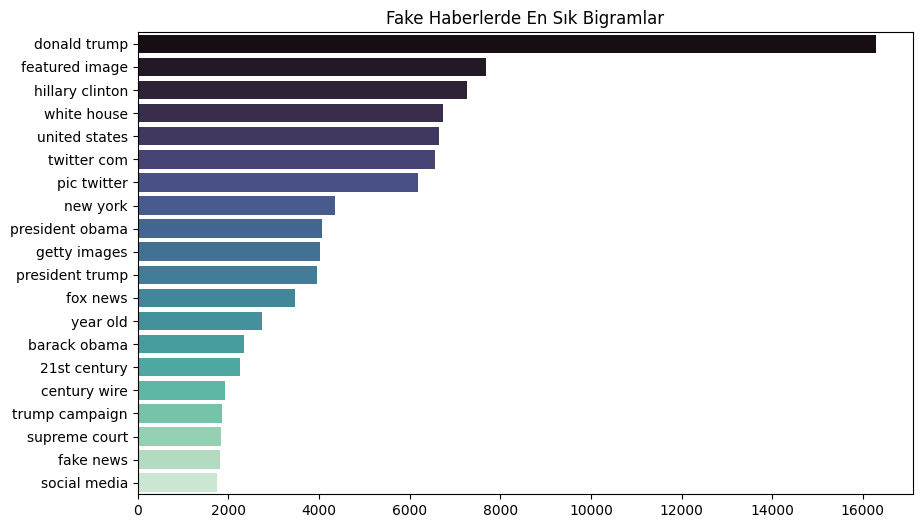

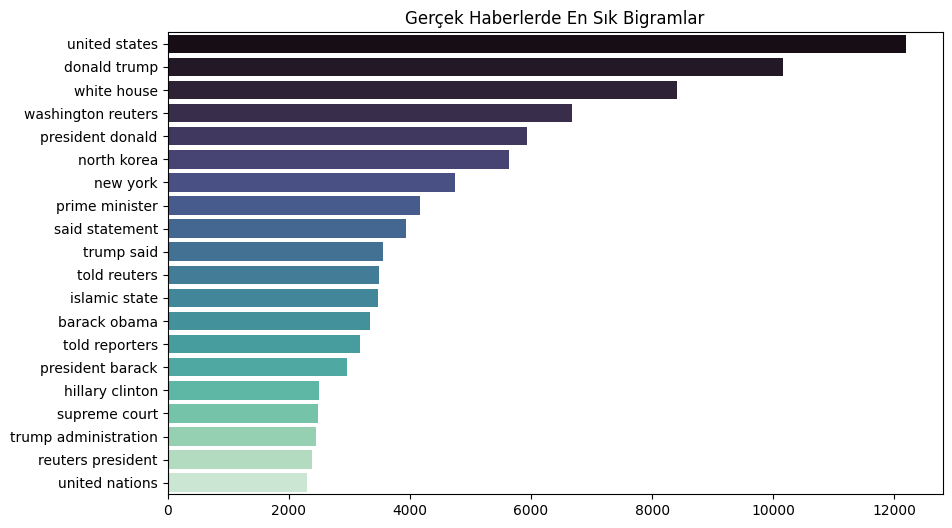

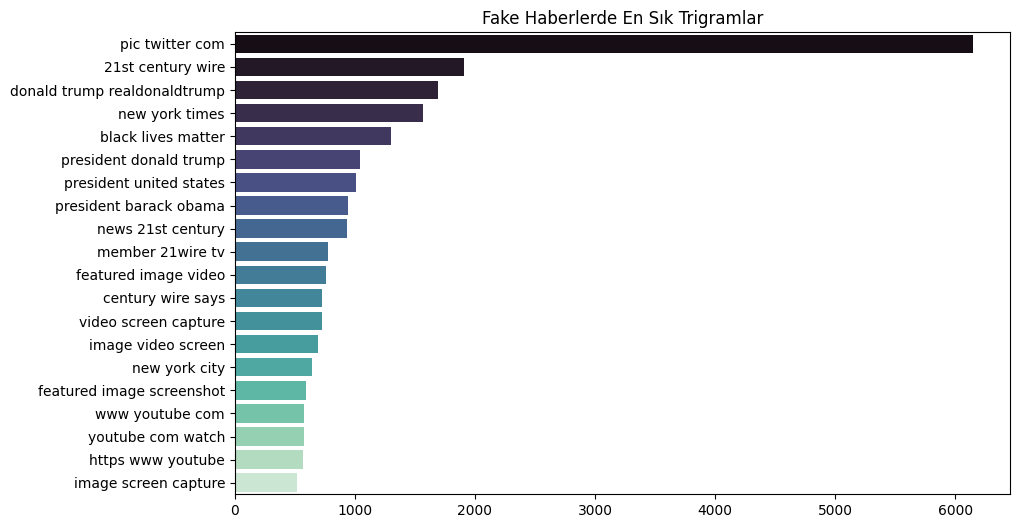

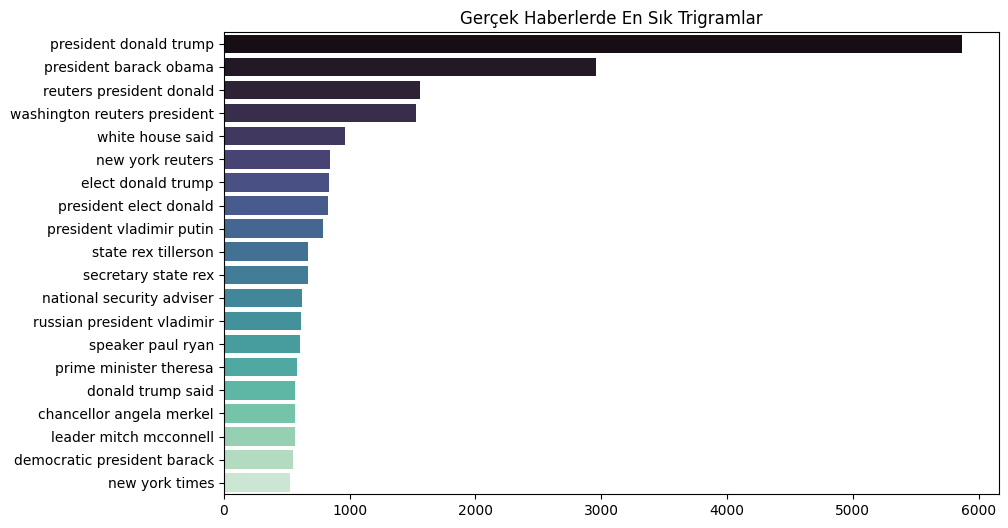

In [ ]:
## N-gram Frekans Analizi

from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(corpus, ngram_range=(2,2), top=20, title=""):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:top]

    # Görselleştirme
    plt.figure(figsize=(10,6))
    sns.barplot(x=[w[1] for w in words_freq], y=[w[0] for w in words_freq], palette="mako")
    plt.title(title)
    plt.show()

# Fake ve Real için ayrı ayrı
plot_ngrams(df[df['class']==0]['text'], ngram_range=(2,2), title="Fake Haberlerde En Sık Bigramlar")
plot_ngrams(df[df['class']==1]['text'], ngram_range=(2,2), title="Gerçek Haberlerde En Sık Bigramlar")

plot_ngrams(df[df['class']==0]['text'], ngram_range=(3,3), title="Fake Haberlerde En Sık Trigramlar")
plot_ngrams(df[df['class']==1]['text'], ngram_range=(3,3), title="Gerçek Haberlerde En Sık Trigramlar")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


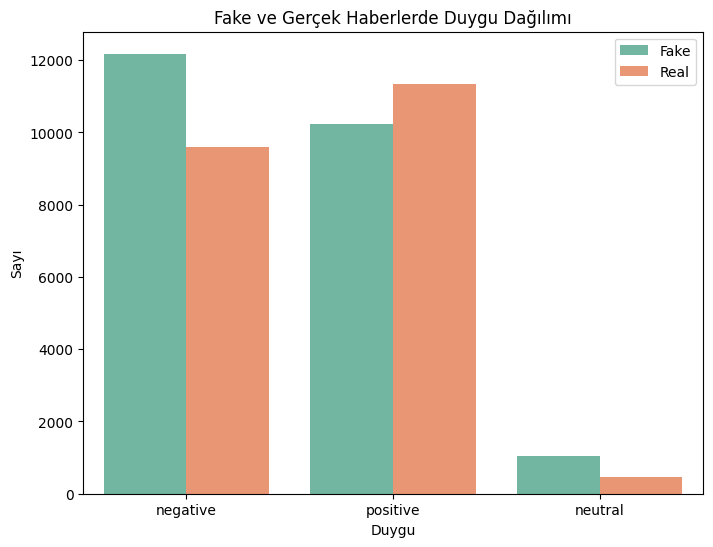

In [ ]:
## Duygu Analizi

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Sentiment skorlarını ekle
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral"))

# Fake vs Real duygu dağılımı
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="sentiment_label", hue="class", palette="Set2")
plt.title("Fake ve Gerçek Haberlerde Duygu Dağılımı")
plt.xlabel("Duygu")
plt.ylabel("Sayı")
plt.legend(["Fake","Real"])
plt.show()


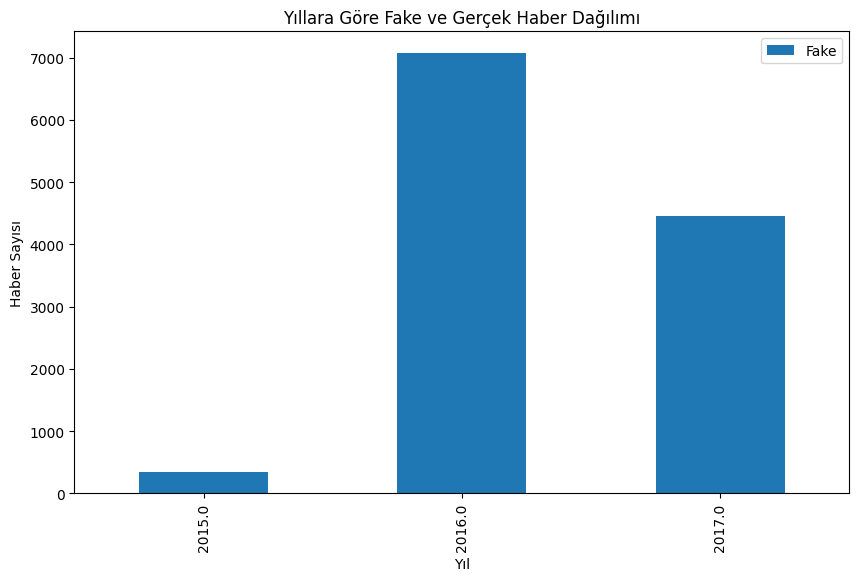

In [ ]:
## Yıllara Göre Fake ve Gerçek Haber Dağılımı Görselleştirmesi

df_time = pd.concat([df_fake, df_true], axis=0)
df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce')

# Yıllık dağılım
yearly = df_time.groupby([df_time['date'].dt.year, 'class']).size().unstack()
yearly.plot(kind='bar', figsize=(10,6))
plt.title("Yıllara Göre Fake ve Gerçek Haber Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Haber Sayısı")
plt.legend(["Fake","Real"])
plt.show()


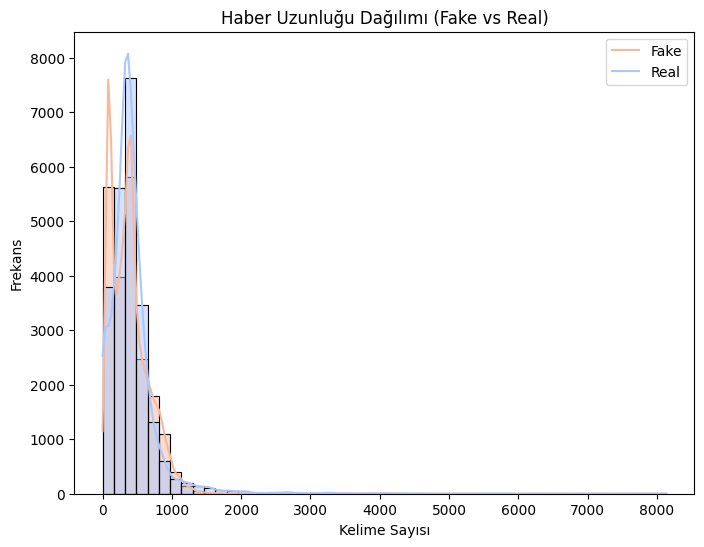

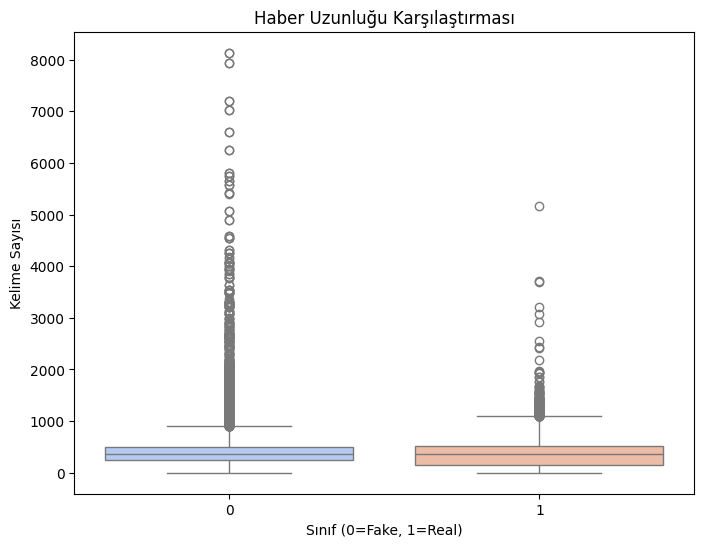

In [ ]:
## Haber Uzunluğu Analizi ve Görselleştirmesi

df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='text_length', hue='class', bins=50, kde=True, palette="coolwarm")
plt.title("Haber Uzunluğu Dağılımı (Fake vs Real)")
plt.xlabel("Kelime Sayısı")
plt.ylabel("Frekans")
plt.legend(["Fake","Real"])
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="class", y="text_length", palette="coolwarm")
plt.title("Haber Uzunluğu Karşılaştırması")
plt.xlabel("Sınıf (0=Fake, 1=Real)")
plt.ylabel("Kelime Sayısı")
plt.show()
